In [1]:
import pandas as pd

df = pd.read_excel("Indices weed-crop.xlsx", sheet_name="PCA-T")


In [3]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  427 non-null    object 
 1   PSSRa    427 non-null    float64
 2   PSSRb    427 non-null    float64
 3   RARSc    427 non-null    float64
 4   PSSRc    427 non-null    float64
 5   CARI     427 non-null    float64
dtypes: float64(5), object(1)
memory usage: 20.1+ KB


,PSSRa,PSSRb,RARSc,PSSRc,CARI
count,427.000000,427.000000,427.000000,427.000000,427.000000
mean,6.304836,5.481765,5.095169,5.107747,1.483079
std,1.556932,1.269091,1.093370,1.106283,0.368094
min,3.244437,2.828939,2.486733,2.472114,0.508824
25%,5.229335,4.574821,4.337286,4.345457,1.246511
50%,5.995831,5.265335,4.926355,4.949786,1.457512
75%,7.043973,6.168050,5.718132,5.752167,1.683727
max,12.239014,10.427906,9.524077,9.581117,2.758396


Accuracy: 0.5930232558139535


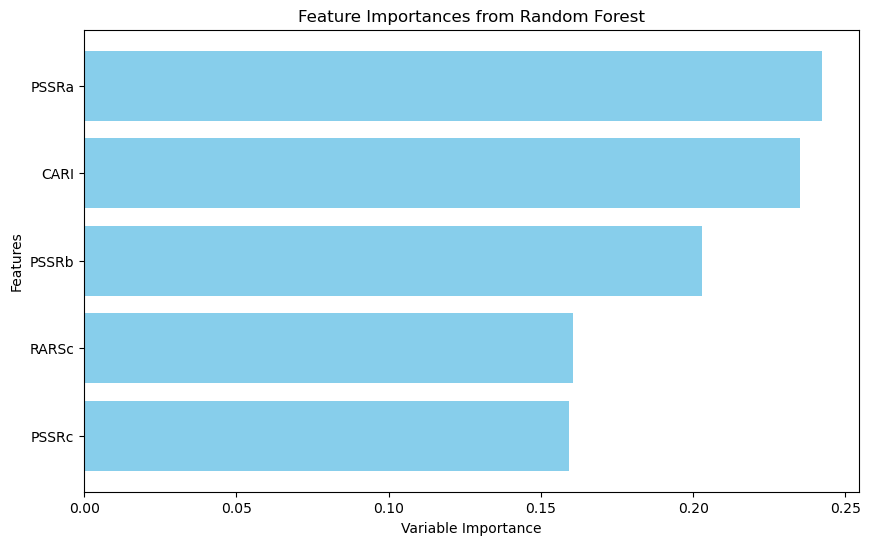

              precision    recall  f1-score   support

       AVEFA       0.86      0.67      0.75         9
      Barley       0.15      0.20      0.17        10
       ECHCG       0.50      0.50      0.50        10
         Oat       0.50      0.22      0.31         9
       PAPRH       0.82      0.90      0.86        10
       POLAV       0.50      0.33      0.40         9
       Wheat       0.69      0.83      0.75        29

    accuracy                           0.59        86
   macro avg       0.57      0.52      0.53        86
weighted avg       0.60      0.59      0.58        86



,AVEFA,Barley,ECHCG,Oat,PAPRH,POLAV,Wheat
AVEFA,66.666667,11.111111,11.111111,0.000000,0.000000,0.000000,11.111111
Barley,0.000000,20.000000,10.000000,10.000000,0.000000,10.000000,50.000000
ECHCG,10.000000,10.000000,50.000000,0.000000,0.000000,10.000000,20.000000
Oat,0.000000,55.555556,11.111111,22.222222,0.000000,0.000000,11.111111
PAPRH,0.000000,0.000000,0.000000,0.000000,90.000000,0.000000,10.000000
POLAV,0.000000,11.111111,22.222222,0.000000,22.222222,33.333333,11.111111
Wheat,0.000000,10.344828,0.000000,3.448276,0.000000,3.448276,82.758621


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df.drop("species", axis=1)  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)



import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

cm_df

from sklearn.metrics import confusion_matrix, classification_report
# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)
cm_df

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 1) Define your high‐level category
monocot_species = ["Barley","Wheat","Oat","AVEFA","ECHCG"]  
# everything else is dicot in your toy example
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')

# 2) Pick only your numeric features automatically
X = df[["PSSRa","PSSRb","PSSRc","RARSc","CARI"]]  # Features
y_cat1 = df['category1']

# 3) Split & train level‑1
X1_tr, X1_te, y1_tr, y1_te = train_test_split(
    X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1
)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X1_tr, y1_tr)

# 4) Train one species‐classifier per category1 (on your existing train split)
mono_idx = X_train_cat1[y_train_cat1=='monocot'].index
dicot_idx = X_train_cat1[y_train_cat1=='dicot'].index

clf_mono_species = RandomForestClassifier(random_state=42)
clf_mono_species.fit(
    X_train_cat1.loc[mono_idx],
    df.loc[mono_idx, 'species']
)

clf_dicot_species = RandomForestClassifier(random_state=42)
clf_dicot_species.fit(
    X_train_cat1.loc[dicot_idx],
    df.loc[dicot_idx, 'species']
)

# 5) Two‐stage prediction on X_test_cat1
final_species_preds = []
for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        sp_pred = clf_mono_species.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        sp_pred = clf_dicot_species.predict(X_test_cat1.loc[[idx]])[0]
    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)
print(classification_report(y_test_species, final_species_preds))

cm = confusion_matrix(y_test_species, final_species_preds)
cm_percentage = cm.astype(float) / cm.sum(axis=1)[:, None] * 100
class_labels = np.unique(y_test_species)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print(cm_df)

cm_df



Final Species-Level Accuracy: 0.6744186046511628
              precision    recall  f1-score   support

       AVEFA       0.75      0.67      0.71         9
      Barley       0.40      0.29      0.33         7
       ECHCG       0.60      0.75      0.67         8
         Oat       0.57      0.36      0.44        11
       PAPRH       0.71      0.91      0.80        11
       POLAV       0.75      0.38      0.50         8
       Wheat       0.71      0.84      0.77        32

    accuracy                           0.67        86
   macro avg       0.64      0.60      0.60        86
weighted avg       0.67      0.67      0.66        86

            AVEFA     Barley      ECHCG        Oat      PAPRH   POLAV  \
AVEFA   66.666667   0.000000  11.111111   0.000000   0.000000   0.000   
Barley  14.285714  28.571429   0.000000  14.285714   0.000000   0.000   
ECHCG   12.500000  12.500000  75.000000   0.000000   0.000000   0.000   
Oat      0.000000   9.090909   9.090909  36.363636   0.000000 

,AVEFA,Barley,ECHCG,Oat,PAPRH,POLAV,Wheat
AVEFA,66.666667,0.000000,11.111111,0.000000,0.000000,0.000,22.222222
Barley,14.285714,28.571429,0.000000,14.285714,0.000000,0.000,42.857143
ECHCG,12.500000,12.500000,75.000000,0.000000,0.000000,0.000,0.000000
Oat,0.000000,9.090909,9.090909,36.363636,0.000000,0.000,45.454545
PAPRH,0.000000,0.000000,0.000000,9.090909,90.909091,0.000,0.000000
POLAV,0.000000,12.500000,12.500000,0.000000,25.000000,37.500,12.500000
Wheat,0.000000,0.000000,3.125000,3.125000,6.250000,3.125,84.375000


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["Barley","Wheat","Oat","AVEFA","ECHCG"]  # example species
dicot_species   = ["PAPRO","POLAV"]
weed_species    = ["AVEFA","PAPRO","POLAV","ECHCG"]  # example of some species labeled as weeds
crop_species    = ["Barley","Wheat","Oat"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["AVEFA","ECHCG"]
monocot_crop_species = [ "Barley","Wheat","Oat"]
dicot_weed_species   = ["PAPRO","POLAV"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Features and target
X = df[["PSSRa","PSSRb","PSSRc","RARSc","CARI"]]  # Features


# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')


y_cat1 = df["category1"]  # Level 1 target 

# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']

# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)

# Now we have predictions for category1 and category2. Next: species level.

# For the third level, we train separate models for each final group:
# Monocot-Weed, Monocot-Crop, Dicot-Weed, Dicot-Crop.

# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

clf_mono_crop = RandomForestClassifier(random_state=42)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model
dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
X_dicot_crop = X[dicot_crop_mask]
y_dicot_crop = df['species'][dicot_crop_mask]

clf_dicot_crop = RandomForestClassifier(random_state=42)
clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)

# instead of unconditionally fitting, do it in one line:
clf_dicot_crop = RandomForestClassifier(random_state=42).fit(
    X_dicot_crop, y_dicot_crop
) if len(y_dicot_crop)>0 else None


# Predict species level on the test set:
# For each test sample, use the predicted category1 and category2 to decide which classifier to use at level 3.

final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

from sklearn.metrics import confusion_matrix, classification_report
# Generate and print the classification report
report = classification_report(y_test_species, final_species_preds)
print(report)

cm_df

Final Species-Level Accuracy: 0.9069767441860465
              precision    recall  f1-score   support

       AVEFA       1.00      0.89      0.94         9
      Barley       0.88      1.00      0.93         7
       ECHCG       0.89      1.00      0.94         8
         Oat       0.92      1.00      0.96        11
       PAPRH       0.83      0.91      0.87        11
       POLAV       0.83      0.62      0.71         8
       Wheat       0.94      0.91      0.92        32

    accuracy                           0.91        86
   macro avg       0.90      0.90      0.90        86
weighted avg       0.91      0.91      0.90        86



,AVEFA,Barley,ECHCG,Oat,PAPRH,POLAV,Wheat
AVEFA,88.888889,0.0,0.0,0.000000,0.000000,0.000,11.111111
Barley,0.000000,100.0,0.0,0.000000,0.000000,0.000,0.000000
ECHCG,0.000000,0.0,100.0,0.000000,0.000000,0.000,0.000000
Oat,0.000000,0.0,0.0,100.000000,0.000000,0.000,0.000000
PAPRH,0.000000,0.0,0.0,9.090909,90.909091,0.000,0.000000
POLAV,0.000000,12.5,12.5,0.000000,0.000000,62.500,12.500000
Wheat,0.000000,0.0,0.0,0.000000,6.250000,3.125,90.625000


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1) Prepare data

y = df["species"]

# 2) Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3) Build a pipeline: scaling + KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn",    KNeighborsClassifier(n_neighbors=5))  # you can tune n_neighbors
])

# 4) Train
knn_pipeline.fit(X_train, y_train)

# 5) Evaluate accuracy
accuracy = knn_pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

# 6) Confusion matrix
y_pred = knn_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


# 7) Confusion matrix as percentages
cm_pct = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test)
cm_df = pd.DataFrame(cm_pct, index=class_labels, columns=class_labels)
print(cm_df)

# 8) Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.5813953488372093
            AVEFA     Barley  ECHCG        Oat      PAPRH      POLAV  \
AVEFA   77.777778  11.111111    0.0   0.000000   0.000000   0.000000   
Barley  10.000000  10.000000   20.0  10.000000   0.000000   0.000000   
ECHCG   20.000000  20.000000   40.0   0.000000  10.000000   0.000000   
Oat     11.111111  55.555556    0.0  11.111111   0.000000   0.000000   
PAPRH    0.000000   0.000000   10.0   0.000000  90.000000   0.000000   
POLAV    0.000000  33.333333    0.0   0.000000  22.222222  44.444444   
Wheat    3.448276   6.896552    0.0   3.448276   0.000000   3.448276   

            Wheat  
AVEFA   11.111111  
Barley  50.000000  
ECHCG   10.000000  
Oat     22.222222  
PAPRH    0.000000  
POLAV    0.000000  
Wheat   82.758621  
              precision    recall  f1-score   support

       AVEFA       0.58      0.78      0.67         9
      Barley       0.07      0.10      0.08        10
       ECHCG       0.57      0.40      0.47        10
         Oat     

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) First split & train Level 1 (Monocot vs Dicot) with KNN
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(
    X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1
)
knn_cat1 = KNeighborsClassifier(n_neighbors=5)
knn_cat1.fit(X_train_cat1, y_train_cat1)

# 2) Train Level 2 KNNs
knn_cat2_monocot = KNeighborsClassifier(n_neighbors=5)
knn_cat2_monocot.fit(X_monocot, y_monocot)

knn_cat2_dicot = KNeighborsClassifier(n_neighbors=5)
knn_cat2_dicot.fit(X_dicot, y_dicot)

# 3) Train Level 3 species‑models
knn_mono_weed = KNeighborsClassifier(n_neighbors=5).fit(X_mono_weed, y_mono_weed)
knn_mono_crop = (KNeighborsClassifier(n_neighbors=5).fit(X_mono_crop, y_mono_crop)
                 if len(y_mono_crop)>0 else None)
knn_dicot_weed = KNeighborsClassifier(n_neighbors=5).fit(X_dicot_weed, y_dicot_weed)
knn_dicot_crop = (KNeighborsClassifier(n_neighbors=5).fit(X_dicot_crop, y_dicot_crop)
                  if len(y_dicot_crop)>0 else None)

# 4) Three‑stage prediction loop
final_preds_knn = []
for idx in X_test_cat1.index:
    c1 = knn_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if c1=='monocot':
        c2 = knn_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]
        if c2=='weed':
            final_preds_knn.append(knn_mono_weed.predict(X_test_cat1.loc[[idx]])[0])
        else:
            final_preds_knn.append(
                knn_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
                if knn_mono_crop else "unknown"
            )
    else:
        c2 = knn_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]
        if c2=='weed':
            final_preds_knn.append(knn_dicot_weed.predict(X_test_cat1.loc[[idx]])[0])
        else:
            final_preds_knn.append(
                knn_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]
                if knn_dicot_crop else "unknown"
            )

# 5) Evaluate
print("KNN final accuracy:", accuracy_score(y_test_species, final_preds_knn))
print(classification_report(y_test_species, final_preds_knn))

cm_knn = confusion_matrix(y_test_species, final_preds_knn)
cm_pct_knn = cm_knn.astype(float)/cm_knn.sum(axis=1)[:,None]*100
cm_knn_df = pd.DataFrame(cm_pct_knn, index=np.unique(y_test_species), columns=np.unique(y_test_species))
print(cm_knn_df)


KNN final accuracy: 0.7441860465116279
              precision    recall  f1-score   support

       AVEFA       0.64      0.78      0.70         9
      Barley       0.43      0.43      0.43         7
       ECHCG       0.88      0.88      0.88         8
         Oat       1.00      0.36      0.53        11
       PAPRH       0.92      1.00      0.96        11
       POLAV       0.71      0.62      0.67         8
       Wheat       0.73      0.84      0.78        32

    accuracy                           0.74        86
   macro avg       0.76      0.70      0.71        86
weighted avg       0.77      0.74      0.73        86

            AVEFA     Barley   ECHCG        Oat  PAPRH  POLAV      Wheat
AVEFA   77.777778   0.000000   0.000   0.000000    0.0   0.00  22.222222
Barley  14.285714  42.857143   0.000   0.000000    0.0   0.00  42.857143
ECHCG   12.500000   0.000000  87.500   0.000000    0.0   0.00   0.000000
Oat      9.090909   9.090909   0.000  36.363636    0.0   0.00  45.454545

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1) Prepare data
X = df[["PSSRa","PSSRb","PSSRc","RARSc","CARI"]]  # Features
y = df["species"]

# 2) Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3) Build a pipeline: scaling + SVM
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svc",    SVC(
        kernel="rbf",       # try "linear" if you want coefficients
        C=1.0,              # regularization parameter
        class_weight="balanced",
        probability=False,  # set True if you need predict_proba
        random_state=42
    ))
])

# 4) Train
svm_pipeline.fit(X_train, y_train)

# 5) Evaluate accuracy
accuracy = svm_pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

# 6) Confusion matrix
y_pred = svm_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


# 7) Confusion matrix as percentages
cm_pct = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test)
cm_df = pd.DataFrame(cm_pct, index=class_labels, columns=class_labels)
print(cm_df)

# 8) Classification report
print(classification_report(y_test, y_pred))


# 9) (Optional) Feature “importance” for a linear SVM:
# If you switch to kernel="linear", you can inspect svm_pipeline.named_steps['svc'].coef_
# to see per-class feature weights:
#
# linear_svc = Pipeline([
#     ("scaler", StandardScaler()),
#     ("svc",    SVC(kernel="linear", C=1.0, random_state=42))
# ])
# linear_svc.fit(X_train, y_train)
# coefs = linear_svc.named_steps['svc'].coef_
# feature_names = X.columns
# # coefs is shape (n_classes, n_features) for multiclass



Accuracy: 0.47674418604651164
            AVEFA     Barley  ECHCG        Oat      PAPRH      POLAV  \
AVEFA   88.888889   0.000000    0.0   0.000000   0.000000   0.000000   
Barley  10.000000  10.000000   10.0  40.000000   0.000000   0.000000   
ECHCG   30.000000  10.000000   30.0  20.000000   0.000000   0.000000   
Oat     11.111111  22.222222    0.0  66.666667   0.000000   0.000000   
PAPRH    0.000000   0.000000   10.0   0.000000  90.000000   0.000000   
POLAV   11.111111  22.222222    0.0   0.000000  11.111111  55.555556   
Wheat    6.896552  13.793103    0.0  41.379310   0.000000   6.896552   

            Wheat  
AVEFA   11.111111  
Barley  30.000000  
ECHCG   10.000000  
Oat      0.000000  
PAPRH    0.000000  
POLAV    0.000000  
Wheat   31.034483  
              precision    recall  f1-score   support

       AVEFA       0.50      0.89      0.64         9
      Barley       0.10      0.10      0.10        10
       ECHCG       0.60      0.30      0.40        10
         Oat    

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1) Define your species groups ---
monocot_species     = ["Barley", "Wheat", "Oat", "AVEFA","ECHCG"]
dicot_species       = ["PAPRH", "POLAV"]
weed_species        = ["AVEFA", "PAPRH", "POLAV","ECHCG"]
crop_species        = ["Barley", "Wheat", "Oat"]

# --- 2) Prepare your DataFrame ---
# assume df is already loaded, with numeric features + a "species" column
X = df.select_dtypes(include=[np.number])
df["species"] = df["species"].astype(str)  # ensure no weird types

# create hierarchical labels
df["category1"] = df["species"].map(lambda s: "monocot" if s in monocot_species else "dicot")
df["category2"] = df["species"].map(lambda s: "weed"    if s in weed_species    else "crop")

# --- 3) Level‑1: monocot vs dicot ---
X_train_l1, X_test_l1, y_train_l1, y_test_l1 = train_test_split(
    X, df["category1"], test_size=0.2, random_state=42, stratify=df["category1"]
)
clf_l1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svc",    SVC(kernel="rbf", C=1.0, random_state=42))
])
clf_l1.fit(X_train_l1, y_train_l1)
y_pred_l1 = clf_l1.predict(X_test_l1)

# split test by predicted level‑1
X_test_mono = X_test_l1[y_pred_l1 == "monocot"]
X_test_dico = X_test_l1[y_pred_l1 == "dicot"]

# --- 4) Level‑2 for monocot ---
mono_mask = df["category1"] == "monocot"
X_mono    = X[mono_mask]
y_mono    = df.loc[mono_mask, "category2"]
X_tr_mono, X_val_mono, y_tr_mono, y_val_mono = train_test_split(
    X_mono, y_mono, test_size=0.2, random_state=42, stratify=y_mono
)
clf_l2_mono = Pipeline([
    ("scaler", StandardScaler()),
    ("svc",    SVC(kernel="rbf", class_weight="balanced" , C=1.0, random_state=42))
])
clf_l2_mono.fit(X_tr_mono, y_tr_mono)

# --- 5) Level‑2 for dicot (guarded) ---
dicot_mask = df["category1"] == "dicot"
X_dicot    = X[dicot_mask]
y_dicot    = df.loc[dicot_mask, "category2"]

if len(y_dicot.unique()) > 1:
    X_tr_dico, X_val_dico, y_tr_dico, y_val_dico = train_test_split(
        X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot
    )
    clf_l2_dico = RandomForestClassifier(random_state=42)
    clf_l2_dico.fit(X_tr_dico, y_tr_dico)
else:
    clf_l2_dico = None
    print("Skipping Level‑2 dicot model: only one class present:", y_dicot.unique())

# --- 6) Level‑3 species models (each guarded if needed) ---
# Monocot‑Weed
mask = (df["category1"]=="monocot") & (df["category2"]=="weed")
clf_mono_weed = Pipeline([
    ("scaler", StandardScaler()),
    ("svc",    SVC(kernel="rbf", class_weight="balanced" , C=1.0, random_state=42))
])
clf_mono_weed.fit(X.loc[mask], df.loc[mask, "species"])

# Monocot‑Crop
mask = (df["category1"]=="monocot") & (df["category2"]=="crop")
clf_mono_crop = Pipeline([
    ("scaler", StandardScaler()),
    ("svc",    SVC(kernel="rbf", class_weight="balanced", C=1.0, random_state=42))
])
clf_mono_crop.fit(X.loc[mask], df.loc[mask, "species"])

# Dicot‑Weed
mask = (df["category1"]=="dicot") & (df["category2"]=="weed")
clf_dico_weed = Pipeline([
    ("scaler", StandardScaler()),
    ("svc",    SVC(kernel="rbf", class_weight="balanced",  C=1.0, random_state=42))
])
clf_dico_weed.fit(X.loc[mask], df.loc[mask, "species"])

# Dicot‑Crop
mask = (df["category1"]=="dicot") & (df["category2"]=="crop")
if mask.sum() > 0:
    clf_dico_crop = Pipeline([
        ("scaler", StandardScaler()),
        ("svc",    SVC(kernel="rbf", class_weight="balanced" ,C=1.0, random_state=42))
    ])
    clf_dico_crop.fit(X.loc[mask], df.loc[mask, "species"])
else:
    clf_dico_crop = None

# --- 7) Final species‑level prediction (with guard) ---
final_preds = []
for idx in X_test_l1.index:
    cat1 = clf_l1.predict(X_test_l1.loc[[idx]])[0]

    if cat1 == "monocot":
        cat2 = clf_l2_mono.predict(X_test_l1.loc[[idx]])[0]
        sp   = (clf_mono_weed if cat2=="weed" else clf_mono_crop).predict(X_test_l1.loc[[idx]])[0]

    else:  # dicot
        if clf_l2_dico is not None:
            cat2 = clf_l2_dico.predict(X_test_l1.loc[[idx]])[0]
        else:
            # only one possible dicot class
            cat2 = y_dicot.unique()[0]

        sp = (clf_dico_weed if cat2=="weed" else clf_dico_crop).predict(X_test_l1.loc[[idx]])[0]

    final_preds.append(sp)

final_preds = np.array(final_preds)
y_true = df.loc[X_test_l1.index, "species"]

# --- 8) Evaluate ---
print("Accuracy:", accuracy_score(y_true, final_preds))
cm      = confusion_matrix(y_true, final_preds)
cm_pct  = cm.astype(float) / cm.sum(axis=1)[:, None] * 100
print(pd.DataFrame(cm_pct, index=np.unique(y_true), columns=np.unique(y_true)))
print(classification_report(y_true, final_preds))


Skipping Level‑2 dicot model: only one class present: ['weed']
Accuracy: 0.627906976744186
            AVEFA     Barley  ECHCG        Oat    PAPRH   POLAV      Wheat
AVEFA   88.888889   0.000000   0.00   0.000000    0.000   0.000  11.111111
Barley  28.571429  28.571429   0.00  14.285714    0.000   0.000  28.571429
ECHCG   25.000000   0.000000  75.00   0.000000    0.000   0.000   0.000000
Oat      9.090909   9.090909   0.00  54.545455    0.000   0.000  27.272727
PAPRH    0.000000   0.000000   0.00   0.000000  100.000   0.000   0.000000
POLAV   12.500000  12.500000  25.00   0.000000   25.000  25.000   0.000000
Wheat    9.375000  12.500000   6.25   6.250000    3.125   3.125  59.375000
              precision    recall  f1-score   support

       AVEFA       0.47      0.89      0.62         9
      Barley       0.25      0.29      0.27         7
       ECHCG       0.60      0.75      0.67         8
         Oat       0.67      0.55      0.60        11
       PAPRH       0.79      1.00     

In [33]:
print(y_train.value_counts())


species
Wheat     115
PAPRH      38
Oat        38
ECHCG      38
Barley     38
AVEFA      38
POLAV      36
Name: count, dtype: int64


In [35]:
# trim whitespace and unify casing
df["species"] = df["species"].str.strip().str.capitalize()
